In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
NAMES = ['WAVELENGTH', 'BANDWIDTH', 'PL_TRANDEP', 'PL_TRANDEPERR1', 'PL_TRANDEPERR2']
df = pd.read_csv('../WASP_96_b_3.11667_5310_1.tbl', comment='\\', delim_whitespace=True, header=4, usecols=[0,1,2,3,4], names =NAMES)

df['PL_TRANDEP'] = df['PL_TRANDEP']*0.01
df['PL_TRANDEPERR1'] = df['PL_TRANDEPERR1']*0.01
df['PL_TRANDEPERR2'] = df['PL_TRANDEPERR2']*0.01
df = df.drop(columns='BANDWIDTH')

df.to_csv('WASP-96b_spectrum_assignment3_taskB.dat')

/tmp/ipykernel_17820/765418375.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('../WASP_96_b_3.11667_5310_1.tbl', comment='\\', delim_whitespace=True, header=4, usecols=[0,1,2,3,4], names =NAMES)


In [43]:
df

,WAVELENGTH,PL_TRANDEP,PL_TRANDEPERR1,PL_TRANDEPERR2
0,0.60044,0.014123,0.001094,-0.001094
1,0.60085,0.015497,0.001291,-0.001291
2,0.60126,0.012824,0.001278,-0.001278
3,0.60167,0.015329,0.001018,-0.001018
4,0.60208,0.014584,0.001236,-0.001236
...,...,...,...,...
2599,2.82452,0.014725,0.001351,-0.001351
2600,2.82553,0.017407,0.001445,-0.001445
2601,2.82654,0.014098,0.001386,-0.001386
2602,2.82755,0.015610,0.001293,-0.001293


ValueError: 'yerr' must not contain negative values

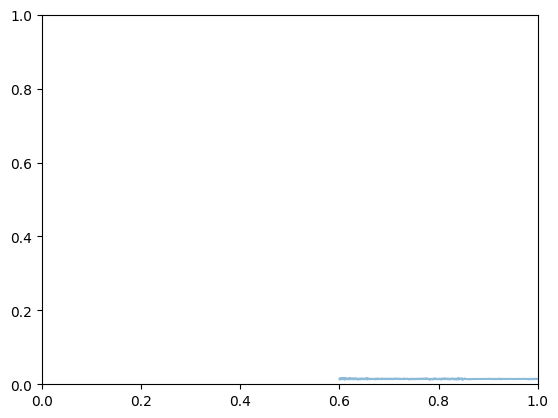

In [ ]:
yerr = np.array([df['PL']]).transpose
plt.errorbar(df['WAVELENGTH'], df['PL_TRANDEP'], yerr=np.transpose(df[['PL_TRANDEPERR1', 'PL_TRANDEPERR2']]), alpha=0.5)
plt.xlabel(r'Central wavelength ($\mu m$)')
plt.ylabel('Transit Depth (%)')

To make the plot clearer, the data hav been pruned using the rolling method of Pandas, which performs a rolling window average (10 points each, than moves to another group of ten).

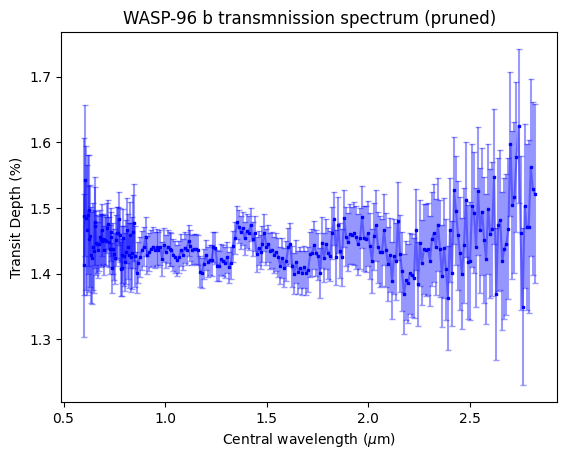

In [ ]:
df_rol = df.rolling(10, step=10, min_periods=1).mean()
plt.errorbar(df_rol['CENTRALWAVELENGTH'], df_rol['PL_TRANDEP'], df_rol['PL_TRANDEPERR1'], capsize=2, alpha=0.4, color='blue')
plt.plot(df_rol['CENTRALWAVELENGTH'], df_rol['PL_TRANDEP'], color='blue', linestyle='', marker='s', markersize=2)
plt.xlabel(r'Central wavelength ($\mu$m)')
plt.ylabel('Transit Depth (%)')
plt.title('WASP-96 b transmnission spectrum (pruned)')
plt.savefig('WASP-96b_spectrum_assignment3_taskB.png')

In [ ]:
with open('WASP-96b_pruned_spectrum.dat', 'w') as f:
    f.write('# Wavelength, (Rp/Rs)^2, err')
    data_dt = df_rol[['CENTRALWAVELENGTH', 'PL_TRANDEP', 'PL_TRANDEPERR1']]
    data_dt['PL_TRANDEP'] = data_dt['PL_TRANDEP']*0.01
    data_dt['PL_TRANDEPERR1'] = data_dt['PL_TRANDEPERR1']*0.01
    data_dt.to_csv(f, sep='\t', header=False, index=False)

/tmp/ipykernel_17820/3707287994.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dt['PL_TRANDEP'] = data_dt['PL_TRANDEP']*0.01
/tmp/ipykernel_17820/3707287994.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dt['PL_TRANDEPERR1'] = data_dt['PL_TRANDEPERR1']*0.01
